In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 25

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 1) 0.40130078258749224 -0.2986535700000026 [1733.36390138 -299.10532632  444.63047517]
(0, 3) 0.21838222588702882 -0.29103733000000176 [629.40838695 913.74097864 315.62964603]
(0, 4) 0.025874140189824965 0.004222120000001439 [-12.59170983  42.46332814  16.76661908]
(0, 5) 0.2876770673594497 -0.5461188900000025 [ 835.34671594 -112.98351393  -37.72592408]
(0, 6) 0.2902886056924373 -0.7975327700000001 [1473.54023897 -139.55573216 -886.24541088]
(0, 7) 0.46534471797182775 -1.1372637700000006 [ 913.6773736   569.16307015 -642.83321039]
(0, 8) 0.49594248791284695 -1.4020428199999984 [  850.11039287    99.89941337 -1459.96991878]
(1, 1) 0.30858559986297196 -0.8307559799999993 [ 534.82516163  138.31589196 -953.46059018]
(1, 4) 0.35187833972031124 -0.6496474999999968 [   82.43109715  -100.46064862 -1281.03851469]
(1, 5) 0.3488669758463745 -0.6452355500000024 [   34.28952672  -180.00403845 -1260.9202389 ]
(1, 6) 0.4335490049600034 -0.8114873399999993 [1300.24221054    6.88909542 -783.1914960

(19, 1) 0.4078572807153851 -0.16969916999999768 [ 754.26917851 -572.05649964  451.35692016]
(19, 4) 0.38184058353817407 -0.09718269000000035 [1336.1689697   164.63188884  328.75394148]
(19, 5) 0.3160546839200613 -0.7288718199999984 [  235.30997645   -99.62624112 -1769.63737317]
(19, 6) 0.33113017113691134 0.6325472999999988 [-418.98575254 -210.79763417 -124.84292338]
(19, 7) 0.11977037909283066 -0.06725976999999972 [311.55394428 378.39046905 722.11118336]
(19, 8) 0.669069435853796 -1.7876233399999997 [ 1282.38843284 -2378.01053976 -4221.63826673]
(20, 1) 0.41938535115051073 -0.788701979999999 [ 791.96355041  649.55160261 -406.02129433]
(20, 2) 0.4755763698476322 -0.49466606000000013 [ 319.44848623  -77.71074896 -550.80935406]
(20, 3) 0.506254348708692 -1.1455915899999987 [1638.92577624  188.0536106   -55.86863313]
(20, 6) 0.6298635286850978 -0.8006063700000006 [-842.79425702  725.05422861 -257.94391325]
(20, 7) 0.30290777366523736 -0.9337857599999992 [1153.528169    369.24284136 -439.5

In [6]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 1) 0.40130078258749224 -0.2986535700000026 [1733.36390138 -299.10532632  444.63047517]
(0, 3) 0.21838222588702882 -0.29103733000000176 [629.40838695 913.74097864 315.62964603]
(0, 4) 0.025874140189824965 0.004222120000001439 [-12.59170983  42.46332814  16.76661908]
(0, 5) 0.2876770673594497 -0.5461188900000025 [ 835.34671594 -112.98351393  -37.72592408]
(0, 6) 0.2902886056924373 -0.7975327700000001 [1473.54023897 -139.55573216 -886.24541088]
(0, 7) 0.46534471797182775 -1.1372637700000006 [ 913.6773736   569.16307015 -642.83321039]
(0, 8) 0.49594248791284695 -1.4020428199999984 [  850.11039287    99.89941337 -1459.96991878]
(1, 1) 0.30858559986297196 -0.8307559799999993 [ 534.82516163  138.31589196 -953.46059018]
(1, 4) 0.35187833972031124 -0.6496474999999968 [   82.43109715  -100.46064862 -1281.03851469]
(1, 5) 0.3488669758463745 -0.6452355500000024 [   34.28952672  -180.00403845 -1260.9202389 ]
(1, 6) 0.4335490049600034 -0.8114873399999993 [1300.24221054    6.88909542 -783.1914960

(15, 4) 0.046694394279569326 -0.008503869999998415 [ -63.87521478  171.65644471 -167.88722394]
(15, 5) 0.5298868463793449 -1.1581622200000012 [1500.38112805  336.05077341 -379.8552093 ]
(15, 6) 0.5263410354071039 -1.983715140000001 [ 2190.05721624 -1224.2435224  -2178.11674619]
(15, 7) 0.24685302135748638 0.6173347800000002 [ 209.92620753 1009.24548692 1034.47517218]
(15, 8) 0.2939828724013152 -0.7972479200000002 [1521.4300366  -156.91923912 -893.76337984]
(15, 9) 0.11569088314382481 -0.032345270000000426 [-145.59581739  207.08774619 -324.14622439]
(16, 0) 0.29068300855927987 -0.7969457999999996 [1525.78346162 -124.32527511 -904.97792601]
(16, 1) 0.40595275256659635 -1.084476200000001 [1563.54782203  487.98067771 -543.09750943]
(16, 2) 0.28630956123480583 -0.9325885700000001 [ 966.67649618  620.1392066  -842.14548044]
(16, 4) 0.3728504738927837 -1.2035673299999985 [  601.71187627  -977.63019741 -1197.85838625]
(16, 5) 0.4078575052817888 -0.001361949999999723 [ 33.75730797  -8.1982128  

In [7]:
filename="clus_Cu4Au4.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[10, 30, 6, 38, 17, 38, 26, 20, 16]
[15, 35, 6, 11, 19, 15, 17, 22, 6]
[52, 33, 23, 23, 53, 24, 25, 6, 21, 22]
[6, 14, 7, 17, 16, 47, 21, 23, 37, 15]
[35, 8, 18, 28, 24, 19, 12, 35, 17, 48]
[31, 33, 14, 10, 30, 50, 31, 31, 12, 10]
[36, 6, 16, 46, 27, 16, 19, 11, 24, 38]
[15, 20, 12, 17, 13, 10, 39, 38, 31, 6]
[34, 43, 8, 38, 45, 27, 27, 18, 21, 20]
[11, 23, 19, 9, 17, 21, 20, 26, 32, 19]
[33, 46, 6, 30, 32, 14, 20, 33, 20, 6]
[7, 6, 9, 24, 19, 28, 29, 24]
[8, 25, 28, 16, 16, 11, 35, 59, 27]
[6, 38, 21, 23, 6, 13, 22, 28, 18]
[29, 30, 6, 27, 16, 6, 63, 50, 35]
[29, 11, 8, 23, 20, 27, 44, 20, 39, 27]
[23, 22, 23, 6, 28, 25, 21, 25, 6, 13]
[26, 23, 27, 9, 6, 27, 24, 19, 41, 22]
[20, 32, 24, 47, 14, 45, 16, 57, 23, 12]
[8, 33, 15, 11, 23, 18, 16, 22, 30]
[18, 17, 37, 29, 6, 23, 41, 22, 42, 27]
[14, 13, 17, 16, 30, 26, 20, 24, 32, 22]
[46, 6, 24, 51, 14, 22, 20, 33, 74, 23]
[21, 15, 10, 6, 6, 26, 7, 14, 6, 14]
[29, 16, 24, 26, 38, 27, 32, 16, 13, 30]


In [8]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[10, 30, 6, 38, 17, 38, 26, 20, 16], [15, 35, 6, 11, 19, 15, 17, 22, 6], [52, 33, 23, 23, 53, 24, 25, 6, 21, 22], [6, 14, 7, 17, 16, 47, 21, 23, 37, 15], [35, 8, 18, 28, 24, 19, 12, 35, 17, 48], [31, 33, 14, 10, 30, 50, 31, 31, 12, 10], [36, 6, 16, 46, 27, 16, 19, 11, 24, 38], [15, 20, 12, 17, 13, 10, 39, 38, 31, 6], [34, 43, 8, 38, 45, 27, 27, 18, 21, 20], [11, 23, 19, 9, 17, 21, 20, 26, 32, 19], [33, 46, 6, 30, 32, 14, 20, 33, 20, 6], [7, 6, 9, 24, 19, 28, 29, 24], [8, 25, 28, 16, 16, 11, 35, 59, 27], [6, 38, 21, 23, 6, 13, 22, 28, 18], [29, 30, 6, 27, 16, 6, 63, 50, 35], [29, 11, 8, 23, 20, 27, 44, 20, 39, 27], [23, 22, 23, 6, 28, 25, 21, 25, 6, 13], [26, 23, 27, 9, 6, 27, 24, 19, 41, 22], [20, 32, 24, 47, 14, 45, 16, 57, 23, 12], [8, 33, 15, 11, 23, 18, 16, 22, 30], [18, 17, 37, 29, 6, 23, 41, 22, 42, 27], [14, 13, 17, 16, 30, 26, 20, 24, 32, 22], [46, 6, 24, 51, 14, 22, 20, 33, 74, 23], [21, 15, 10, 6, 6, 26, 7, 14, 6, 14], [29, 16, 24, 26, 38, 27, 32, 16, 13, 30]]
25
[9, 9, 10, 

In [9]:
print(len(similar_clus))
print(similar_clus)

72
[(0, 0), (0, 2), (1, 0), (1, 2), (1, 3), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 7), (4, 1), (5, 0), (5, 9), (6, 1), (6, 5), (6, 9), (7, 0), (7, 1), (7, 3), (7, 5), (7, 9), (8, 2), (8, 5), (8, 9), (9, 0), (9, 1), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (10, 2), (10, 9), (11, 0), (11, 1), (11, 2), (12, 0), (12, 4), (12, 8), (13, 0), (13, 3), (13, 4), (13, 5), (14, 2), (14, 5), (15, 1), (15, 2), (16, 3), (16, 6), (16, 7), (16, 8), (16, 9), (17, 4), (17, 5), (18, 4), (19, 0), (19, 2), (19, 3), (20, 0), (20, 4), (20, 5), (21, 1), (21, 2), (21, 9), (22, 1), (22, 4), (23, 3), (23, 4), (23, 6), (23, 8), (24, 1)]


In [10]:
file_vasp="results.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[24, 3, 9, 27, 21, 14, 51, 16, 41, 11, 51, 7, 84, 72, 92, 30, 25, 13, 59, 77, 49, 18, 17, 14, 55, 7, 16, 75, 9, 43, 11, 14, 22, 58, 19, 13, 14, 15, 58, 40, 45, 69, 60, 34, 22, 36, 21, 74, 63, 52, 16, 26, 14, 87, 40, 22, 48, 29, 45, 8, 22, 88, 15, 52, 54, 67, 23, 42, 40, 40, 18, 165, 20, 25, 81, 49, 16, 17, 35, 103, 31, 42, 48, 74, 13, 32, 32, 15, 42, 99, 52, 50, 15, 17, 18, 66, 44, 61, 102, 51, 7, 63, 50, 23, 18, 18, 60, 8, 11, 11, 27, 20, 37, 18, 49, 37, 12, 75, 20, 47, 11, 26, 18, 17, 82, 9, 17, 11, 36, 16, 29, 18, 58, 20, 15, 17, 7, 40, 20, 9, 73, 15, 17, 88, 27, 48, 17, 24, 43, 15, 52, 54, 24, 20, 20, 34, 11, 13, 43, 52, 82, 7, 19, 67, 18, 54, 45, 11, 59, 64, 99, 3, 44, 18, 38, 20, 32, 45, 40, 18, 55, 83, 26, 12, 16, 36, 27, 29, 15, 16, 18, 48, 52, 11, 70, 16, 9, 20, 93, 30, 16, 54, 66, 30, 11, 22, 26, 34, 29, 17, 14, 77, 74, 13, 18, 44, 28, 56, 25, 59, 43, 20, 32, 20, 24, 6, 11, 56, 10, 17, 7, 24, 53, 46, 57, 30, 38, 36, 18, 20, 32, 78, 135, 29, 21, 80, 79, 18, 55, 20, 33, 18]


[

In [11]:
print(new_vasp_calls)

[[10, 30, 6, 38, 17, 38, 26, 20, 16], [15, 35, 6, 11, 19, 15, 17, 22, 6], [52, 33, 23, 23, 53, 24, 25, 6, 21, 22], [6, 14, 7, 17, 16, 47, 21, 23, 37, 15], [35, 8, 18, 28, 24, 19, 12, 35, 17, 48], [31, 33, 14, 10, 30, 50, 31, 31, 12, 10], [36, 6, 16, 46, 27, 16, 19, 11, 24, 38], [15, 20, 12, 17, 13, 10, 39, 38, 31, 6], [34, 43, 8, 38, 45, 27, 27, 18, 21, 20], [11, 23, 19, 9, 17, 21, 20, 26, 32, 19], [33, 46, 6, 30, 32, 14, 20, 33, 20, 6], [7, 6, 9, 24, 19, 28, 29, 24], [8, 25, 28, 16, 16, 11, 35, 59, 27], [6, 38, 21, 23, 6, 13, 22, 28, 18], [29, 30, 6, 27, 16, 6, 63, 50, 35], [29, 11, 8, 23, 20, 27, 44, 20, 39, 27], [23, 22, 23, 6, 28, 25, 21, 25, 6, 13], [26, 23, 27, 9, 6, 27, 24, 19, 41, 22], [20, 32, 24, 47, 14, 45, 16, 57, 23, 12], [8, 33, 15, 11, 23, 18, 16, 22, 30], [18, 17, 37, 29, 6, 23, 41, 22, 42, 27], [14, 13, 17, 16, 30, 26, 20, 24, 32, 22], [46, 6, 24, 51, 14, 22, 20, 33, 74, 23], [21, 15, 10, 6, 6, 26, 7, 14, 6, 14], [29, 16, 24, 26, 38, 27, 32, 16, 13, 30]]


In [12]:
print(similar_clus)

[(0, 0), (0, 2), (1, 0), (1, 2), (1, 3), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 7), (4, 1), (5, 0), (5, 9), (6, 1), (6, 5), (6, 9), (7, 0), (7, 1), (7, 3), (7, 5), (7, 9), (8, 2), (8, 5), (8, 9), (9, 0), (9, 1), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (10, 2), (10, 9), (11, 0), (11, 1), (11, 2), (12, 0), (12, 4), (12, 8), (13, 0), (13, 3), (13, 4), (13, 5), (14, 2), (14, 5), (15, 1), (15, 2), (16, 3), (16, 6), (16, 7), (16, 8), (16, 9), (17, 4), (17, 5), (18, 4), (19, 0), (19, 2), (19, 3), (20, 0), (20, 4), (20, 5), (21, 1), (21, 2), (21, 9), (22, 1), (22, 4), (23, 3), (23, 4), (23, 6), (23, 8), (24, 1)]


In [13]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[10, 6, 15, 6, 11, 6, 21, 6, 14, 7, 23, 8, 31, 10, 6, 16, 38, 15, 20, 17, 10, 6, 8, 27, 20, 11, 23, 9, 17, 21, 20, 26, 6, 6, 7, 6, 9, 8, 16, 27, 6, 23, 6, 13, 6, 6, 11, 8, 6, 21, 25, 6, 13, 6, 27, 14, 8, 15, 11, 18, 6, 23, 13, 17, 22, 6, 14, 6, 6, 7, 6, 16]
960
[24, 9, 11, 7, 84, 7, 16, 9, 43, 11, 13, 40, 63, 29, 8, 52, 42, 40, 40, 165, 25, 17, 31, 74, 15, 42, 99, 50, 15, 17, 18, 66, 7, 8, 11, 11, 27, 12, 11, 82, 9, 36, 16, 29, 7, 9, 27, 48, 11, 52, 82, 7, 19, 11, 59, 45, 12, 36, 27, 52, 9, 20, 30, 11, 77, 13, 28, 6, 11, 10, 7, 46]
2213
[14, 3, -4, 1, 73, 1, -5, 3, 29, 4, -10, 32, 32, 19, 2, 36, 4, 25, 20, 148, 15, 11, 23, 47, -5, 31, 76, 41, -2, -4, -2, 40, 1, 2, 4, 5, 18, 4, -5, 55, 3, 13, 10, 16, 1, 3, 16, 40, 5, 31, 57, 1, 6, 5, 32, 31, 4, 21, 16, 34, 3, -3, 17, -6, 55, 7, 14, 0, 5, 3, 1, 30]
1253
72


(0.0, 0.025)

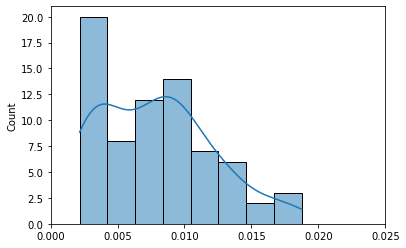

In [14]:
import seaborn as sns
g = sns.histplot(similar_clus_diff_dist, kde=True)
g.set_xlim(0.0, 0.025)

<AxesSubplot:ylabel='Count'>

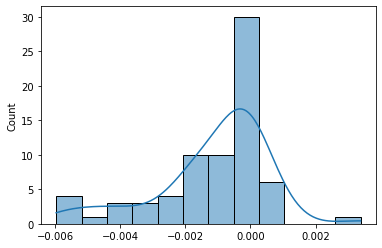

In [15]:
sns.histplot(similar_clus_ene_list, kde=True)

In [16]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.005971200000001176, -0.005580250000001286, -0.005521590000000742, -0.005327770000000953, -0.004650250000000966, -0.004351719999998949, -0.0042542100000027006, -0.004204149999999629, -0.0034300900000019396, -0.003342629999998792, -0.0029520299999994393, -0.0023859899999969514, -0.0023289599999998245, -0.0022088399999979913, -0.0021162199999977815, -0.0019147400000001369, -0.0017660999999975502, -0.001734589999998093, -0.001707439999997007, -0.0016879000000002975, -0.0016813999999989448, -0.0016196300000004271, -0.001606190000000396, -0.0015876600000019891, -0.001498959999999272, -0.0012796200000018132, -0.001165900000000164, -0.0010987100000008354, -0.0010669199999995271, -0.0010025599999998747, -0.000966149999999999, -0.0009490300000010166, -0.0008854299999967452, -0.0006720700000002466, -0.0006073800000017116, -0.0004524999999979684, -0.000414119999998519, -0.000414119999998519, -0.0003831400000002816, -0.0003779600000015648, -0.0003779600000015648, -0.0003779600000015648, -0.0003

In [17]:
print(sorted(similar_clus_diff_dist))

[0.002169492094698758, 0.0021694926095885414, 0.002405313878403176, 0.0024053141036763925, 0.0024053161574006388, 0.002405316672445673, 0.0024905181361694617, 0.0025215526098139873, 0.0032131231493973678, 0.003213124307898829, 0.0032667209425288196, 0.003266745078000871, 0.003321040453398108, 0.003321040885088375, 0.003321041381833173, 0.0035939033634427298, 0.0036948251387513426, 0.003767793954591425, 0.004093023889580216, 0.004191149909859013, 0.0044301672559416, 0.004430179479808116, 0.004657823835692118, 0.005084765459636903, 0.005583722218717682, 0.005856346437866339, 0.005969050644831095, 0.006047494690123681, 0.006548594403919708, 0.0068168250290519955, 0.006868607467864565, 0.0069197844660908725, 0.007239912164586915, 0.007460403055127421, 0.0075243111372677585, 0.007824049682478393, 0.007857939381641074, 0.008043030391729086, 0.00804605142591433, 0.008371312886776366, 0.008563555811729046, 0.008669377984196189, 0.00887612591062166, 0.009094426313176224, 0.009116017238029128, 0

In [18]:
import pickle
with open ('Cu4Au4_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Cu4Au4_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)